In [35]:
# Importing necessary libraries
import pandas as pd# For data manipulation and analysis
import numpy as np  # For numerical computations
import matplotlib.pyplot as plt  # For plotting and visualization
import seaborn as sns  # For statistical data visualization
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, PowerTransformer


# Explanation:
# - pandas: This library is used for data manipulation and analysis. It provides data structures and functions needed to work on structured data seamlessly.
# - numpy: This library is used for numerical computations. It provides support for arrays and matrices, along with a large number of mathematical functions.
# - matplotlib: This is a plotting library used for creating static, interactive, and animated visualizations in Python.
# - seaborn: This is a data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.


In [36]:
 #Importing/Loading the dataset into a pandas DataFrame.
    
df = pd.read_csv('glass.csv')

# Display the first few rows of the dataframe
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [37]:
# 3a: Checking the number of observations using various methods.

# Number of observations and columns using info()
df.info()

# Number of rows using len()
num_rows = len(df)
print(f'Number of rows: {num_rows}')

# Number of columns using len(columns)
num_columns = len(df.columns)
print(f'Number of columns: {num_columns}')

# Number of rows and columns using axes
num_rows_axes = len(df.axes[0])
num_columns_axes = len(df.axes[1])
print(f'Number of rows (using axes): {num_rows_axes}')
print(f'Number of columns (using axes): {num_columns_axes}')

# Total number of elements using size
total_elements = df.size
print(f'Total number of elements: {total_elements}')

# Shape of the dataframe
data_shape = df.shape
print(f'Shape of the dataframe: {data_shape}')



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB
Number of rows: 214
Number of columns: 10
Number of rows (using axes): 214
Number of columns (using axes): 10
Total number of elements: 2140
Shape of the dataframe: (214, 10)


In [38]:
#3b: Examining a few rows and the structure of the dataset.

# Displaying the first 5 rows
df.head()

# Displaying the last 5 rows
df.tail()


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
209,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
213,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


In [39]:
#3c: Displaying the summary statistics.

# Summary statistics of the dataset
df.describe()


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [40]:
#3d: Determining the column names and the data types of the variables.

# Column names
column_names = df.columns
print(f'Column names: {column_names}')

# Data types of the variables
data_types = df.dtypes
print(f'Data types:\n{data_types}')

Column names: Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')
Data types:
RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object


In [41]:
# 4: Check and deal with the missing values in the dataset.

# Checking for missing values
missing_values = df.isnull().sum()
print(f'Missing values in each column:\n{missing_values}')

# Total number of missing entries
total_missing = missing_values.sum()
print(f'Total number of missing entries: {total_missing}')

# Columns with missing values
columns_with_missing = missing_values[missing_values > 0]
print(f'Columns with missing values:\n{columns_with_missing}')

# Handling missing values (Example: Filling missing values with the mean of the column)
df_filled = df.fillna(df.mean())

Missing values in each column:
RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64
Total number of missing entries: 0
Columns with missing values:
Series([], dtype: int64)


In [42]:
#  5: Convert categorical data into numerical data.

# converting categorical data using one-hot encoding
df_encoded = pd.get_dummies(df_filled, drop_first=True)

# Display the first few rows of the encoded dataframe
df_encoded.head()


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


Number of rows before: 214
Number of rows after: 136


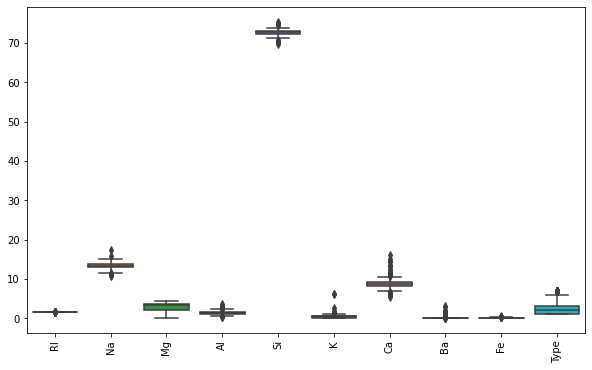

Number of outliers in each column:
RI      3
Na      2
Mg      0
Al      3
Si      6
K       3
Ca      7
Ba      6
Fe      3
Type    0
dtype: int64


In [43]:
# 6: Checking and handling outliers. Identify and decide on a method to handle outliers.

#Checking for outliers using quartiles
def remove_outliers_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    df_cleaned = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
    return df_cleaned

df_cleaned = remove_outliers_iqr(df)

# Display the number of rows before and after removing outliers
print(f"Number of rows before: {df.shape[0]}")
print(f"Number of rows after: {df_cleaned.shape[0]}")

# Checking for outliers using boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_encoded)
plt.xticks(rotation=90)
plt.show()

# Example: Removing outliers using Z-score
from scipy import stats

z_scores = np.abs(stats.zscore(df_encoded))
outliers = (z_scores > 3).sum(axis=0)
print(f'Number of outliers in each column:\n{outliers}')

# Removing outliers
df_no_outliers = df_encoded[(z_scores < 3).all(axis=1)]

# Explanation of options to handle outliers:
# 1. Removing outliers: This method simply removes the rows containing outliers.
# 2. Imputation: Replace outliers with mean, median, or a value based on business logic.
# 3. Transformation: Apply transformations like log, square root to reduce the effect of outliers.


In [44]:
# 7 feature transformation techniques
1. Correlation Analysis:
Pros: Simple and easy to interpret; helps in identifying linear relationships between features and the target variable.
Cons: May not capture non-linear relationships or feature interactions.
Justification: Provides a quick way to identify features with potential predictive power.

2.Feature Importance from Random Forest:
Pros: Considers both linear and non-linear relationships; accounts for interactions between features; model-based approach.
Cons: Computationally intensive; dependent on the specific model used.
Justification: Provides a robust selection of features by leveraging the predictive power of a well-performing model.
Feature Transformation Techniques

3.Standardization:
Pros: Essential for models sensitive to feature scaling (e.g., SVM, KNN); ensures all features contribute equally to the model.
Cons: Not suitable for handling skewed data alone.
Justification: Standardizes the features to have zero mean and unit variance, which is crucial for many machine learning algorithms.

4.Log Transformation (PowerTransformer):
Pros: Reduces skewness; handles zero and negative values; minimizes the impact of outliers; makes data more Gaussian-like.
Cons: Can be complex to implement and understand.
Justification: Helps in normalizing the data distribution and reducing the influence of extreme values, leading to better model performance.

SyntaxError: invalid syntax (3543557510.py, line 2)

In [45]:
# Correlation Analysis
corr_matrix = df_cleaned.corr()
target_corr = corr_matrix['Type'].abs().sort_values(ascending=False)
print("Correlation with target variable 'Type':")
print(target_corr)



Correlation with target variable 'Type':
Type    1.000000
Mg      0.583362
Al      0.329420
Na      0.325077
K       0.237614
Ca      0.231354
Fe      0.133813
RI      0.094377
Si      0.044317
Ba           NaN
Name: Type, dtype: float64


In [46]:
# Define features and target
X = df_cleaned.drop('Type', axis=1)
y = df_cleaned['Type']

# Train a Random Forest model to get feature importances
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X, y)

# Get feature importance
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)
print("Feature Importances:")
print(feature_importances)


Feature Importances:
RI    0.215281
Al    0.201430
Ca    0.137526
Mg    0.126944
K     0.100626
Si    0.089014
Na    0.081389
Fe    0.047790
Ba    0.000000
dtype: float64


In [47]:
# Select top 5 features based on importance
selected_features = feature_importances.head(5).index.tolist()
X_selected = df_cleaned[selected_features]

# Apply Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

# Apply Log Transformation (PowerTransformer with method 'yeo-johnson')
pt = PowerTransformer(method='yeo-johnson')
X_transformed = pt.fit_transform(X_scaled)

# Convert back to DataFrame
df_transformed = pd.DataFrame(X_transformed, columns=selected_features)

# Display the transformed features
print("Transformed features:")
print(df_transformed.head())


Transformed features:
         RI        Al        Ca        Mg         K
0  1.597242 -0.882091  0.387042  5.728743 -1.742828
1  0.053113  0.041440 -1.499623  0.238291 -0.305119
2 -1.147438  0.700173 -1.626901  0.062227 -0.700822
3  0.087399 -0.210244 -0.587351  0.589712  0.191466
4 -0.082221 -0.388466 -0.920689  0.312538  0.071302


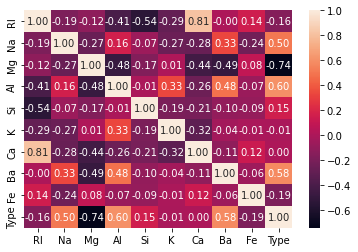

In [49]:
corr = df_encoded.corr() #calculating the correlation matrix of a DataFrame
sns.heatmap(corr, annot=True, fmt=".2f")
plt.show()